## Mostly From Aneta Siemiginowska, "X-ray Astronomy Handbook", October 2008  other references http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

(See http://cxc.harvard.edu/sherpa4.4/references/papers/statistics.pdf)

## 1.2  Probability Distributions

Probability is a quantity that describes a fraction of favorable events and it is a numerical measure of our belief. Laplace principle of indifference states that all events have equal probability. The Kolmogorov axioms give a base for the probability theory:

$\bullet$ Any random event, $A$, has a probability $0 < P (A) < 1$

$\bullet$ A probability of a sure event is equal to 1, $P(A) = 1$

$\bullet$ If A and B are exclusive events then $P(AB)= P(A)+P(B)$

The probability distribution is a function describing a probability of an event given a total number of events. If x is a continuous random variable then f (x) is its probability density function or simply probability distribution when:

( 1 ) prob ($a < x < b$ ) = í¯¿ $\int^{b}_{a} f(x) dx$

(2)í¯¿âˆž $\int^{\infty}_{-\infty} f(x) dx = 1$

(3) $f(x)$ is a single non-negative number for all real x.

The two most widely used in X-rays probability distributions are Poisson
and Gaussian distributions.  


###Poisson probability:

The Poisson probability gives the probability of receiving $n$ counts given an expectation of $\mu$.  Here $\mu$ can be the number expected based on some model or the average based on some experimental data.  

$$ P(n;\mu) = \frac{e^{âˆ’\mu} \mu^{n}}{n!} $$

For X-ray astronomy, $n$ is the integer number of counts (in the bin), and $\mu$ is the (floating-point) expectation value (the average of the distribution, or the number of expected model counts in the bin)

Below is a function, pois_prob, that calculates the Poisson probably of $n$ given $\mu$.  To avoid numerical overflows we first calculate the log of the probability, then take the anti-log.  We also use the log of the gamma function to calculate the log of the factorial in the denominator, since $N!$ = $\gamma(N+1)$.

In [34]:
#
# calculation of Poissonian probability
#
def poiss_prob(n, mu):
    from scipy import special
    import math  
    lnprob=-mu + n*math.log(mu) - special.gammaln(n+1)
    return math.exp(lnprob)
    

In [45]:
print poiss_prob(10,5)
from scipy import integrate
a=9
b=11
prob=integrate.quad(poiss_prob,a,b,args=(5)) # calculate the probability that the number of counts falls between a and b
print prob

0.0181327887078
(0.03901645156119896, 4.3316962862415224e-16)


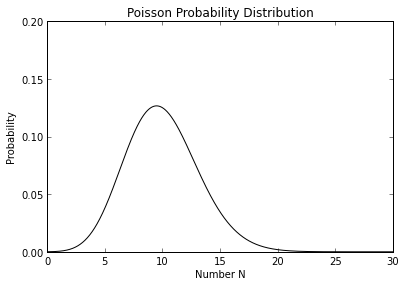

In [31]:
from numpy import *
x=linspace(0,30,1000)
p=zeros(len(x))
mu=10.
for i in range(0,len(x)-1):
    p[i]=poiss_prob(x[i],mu)
fig=plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes1.plot(x, p, 'black')
axes1.set_xlabel('Number N')
axes1.set_ylabel('Probability')
axes1.set_title('title')
axes1.set_ylim([0,0.2])
axes1.set_xlim([0,30])
axes1.set_title('Poisson Probability Distribution');


###Gaussian probability:

The probability of getting $n$ counts from a model having an expectation of $\mu$ counts and a distribution width $\sigma$ is 
$$ G(n;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} exp{\frac{-(n-\mu)^2}{2\sigma^{2}}} $$


In [3]:
#
# calculation of Gaussian probability
#
def gauss_prob(n, mu, sigma):
    import math  
    pi=3.1415927
    g=1.0/(sigma*math.sqrt(2*pi))*math.exp((-(n-mu)**2)/(2.0*sigma**2))
    return g

In [10]:
from sympy import *
g=symbols('g',cls=Function)
n, mu, s = symbols('n,mu,s')
g=1/(s*sqrt(2*pi))*e**((-(n-mu)**2)/(2*s**2))
print g
Integral(g,n)

sqrt(2)*2.71828182845905**(-(-mu + n)**2/(2*s**2))/(2*sqrt(pi)*s)


Integral(sqrt(2)*2.71828182845905**(-(-mu + n)**2/(2*s**2))/(2*sqrt(pi)*s), n)

In [69]:
print gauss_prob(8, 15, 4)
from scipy import integrate
a=6
b=7
mu=5.2
sigma=3.17
# calculate the probability that the number of counts falls between a and b
prob_int, err =integrate.quad(gauss_prob,,b,args=(mu, sigma)) 
print prob_int

0.0215693295473
0.115301651301


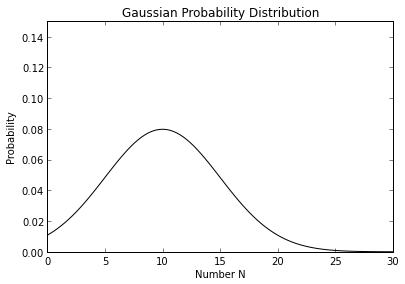

In [68]:
mu=10.
sigma=5.
#from numpy import *
import numpy as np
vgauss_prob=np.vectorize(gauss_prob) # creates a vectorized version of the specified function (gauss_prob)
x=linspace(0,30,100)
g=vgauss_prob(x, mu, sigma)
fig=plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes1.plot(x, g, 'black')
axes1.set_xlabel('Number N')
axes1.set_ylabel('Probability')
axes1.set_title('title')
axes1.set_ylim([0,0.15])
axes1.set_xlim([0,30])
axes1.set_title('Gaussian Probability Distribution');

In [81]:
# is gauss_prob normalized?
import numpy as np
tot_prob, err = integrate.quad(gauss_prob,-np.inf,np.inf,args=(mu,sigma))
print tot_prob  # should be 1... 

1.75298777262e-10


Question:
How much of the area under the gaussian probability distribution is covered in the interval $\pm3\sigma$ around the mean?

In [76]:
mu=100
sigma=3.17
a=mu-3.0*sigma
b=mu+3.0*sigma
# calculate the probability that the number of counts falls between a and b
prob_int, err =integrate.quad(gauss_prob,a,b,args=(mu, sigma)) 
print prob_int

0.99730019657


Thus $3\sigma$ corresponds to the 99.7% confidence limit, i.e. the counts in any bin have a 99.7% chance of being within $3\sigma$ of the mean for the bin.

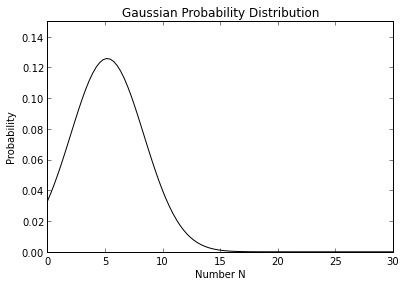

In [70]:
#
# another calculation of gaussian probability using a loop
#
g=zeros(len(x))
for i in range(0,len(x)-1):
    g[i]=gauss_prob(x[i],mu,sigma)
fig=plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes1.plot(x, g, 'black')
axes1.set_xlabel('Number N')
axes1.set_ylabel('Probability')
axes1.set_title('title')
axes1.set_ylim([0,0.15])
axes1.set_xlim([0,30])
axes1.set_title('Gaussian Probability Distribution');

1.5 Maximum Likelihood
----------------------
The Probability density function $f(X,\theta)$ (where $X$ describes the X-ray data and $\theta$ model parameters) appropriate to fitting of X-ray counts spectra is the Poisson probability because of the Poissonian nature of the X-ray counts data. We want to estimate which values of  $\theta$ have the maximum likelihood of producing the observed counts spectrum. If $X_1, X_2 ... X_N$ are the X-ray counts data in each $N$ bin, and each bin is independent and drawn from the Poisson distribution $P$, then the likelihood function is:
     $$L(X_1, X_2, ....X_N ) = P(X_1, X_2, ...X_N |\theta) $$
     $$L(X_1, X_2, ....X_N ) = P(X_1|\theta)P(X_2|\theta)....P(X_N |\theta) $$
     $$L(X_1, X_2, ....X_N ) =\Pi_{i=1}^N P(X_i |\theta)$$

summed over all data bins. 
Finding the maximum likelihood means finding the parameter set $\theta_0$ that maximizes the likelihood function.

Suppose you have a 3-channel spectrum with detected counts of (10, 100, 200) in channel 1-3.  Suppose some model with a set of parameters $\theta_a$ predicts counts of (10.7, 508.9, 75.5) for each of the 3 channels.  Then the likelihood $L$ for this set of parameters is 

$$L=P(15 | 10.7) \times P(520 | 508.9) \times P(74 | 75.5)$$

or

In [51]:
print poiss_prob(15,10.7),poiss_prob(520,508.9),poiss_prob(74,75.5)
print poiss_prob(15,10.7)*poiss_prob(520,508.9)*poiss_prob(74,75.5)

0.0475670368007 0.0155111253914 0.0456342141581
3.36697570486e-05


(Note: for information on markdown formatting see http://daringfireball.net/projects/markdown/basics)

(note that Aneta got **0.116** for this calculation...)

test